In [123]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [124]:
df = pd.read_csv('StudentsPerformance.csv')
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [125]:
df['parental level of education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [126]:
df['parental level of education'].replace({'some college': 'college', 'some high school': 'high school'}, inplace=True)
df['parental level of education'].unique()

C:\Users\Dell\AppData\Local\Temp\ipykernel_19236\940651339.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['parental level of education'].replace({'some college': 'college', 'some high school': 'high school'}, inplace=True)


array(["bachelor's degree", 'college', "master's degree",
       "associate's degree", 'high school'], dtype=object)

In [127]:
df.drop_duplicates()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,college,standard,completed,68,78,77


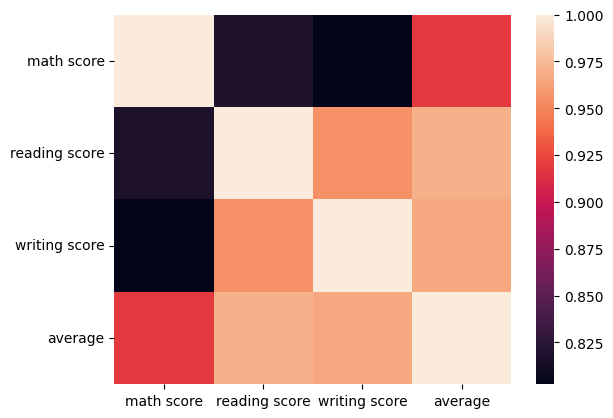

In [128]:
df['average'] = (df['math score'] + df['writing score'] + df['reading score']) / 3
numeric = df.select_dtypes(include='number')

sns.heatmap(numeric.corr())
plt.yticks(rotation=0)
plt.show()

# Observations:
# - reading score and writing score are very related
# - math score has very little correlation with other scores

In [129]:
df = df.drop(axis=0, index=df[df['average'] < 10].index[0])

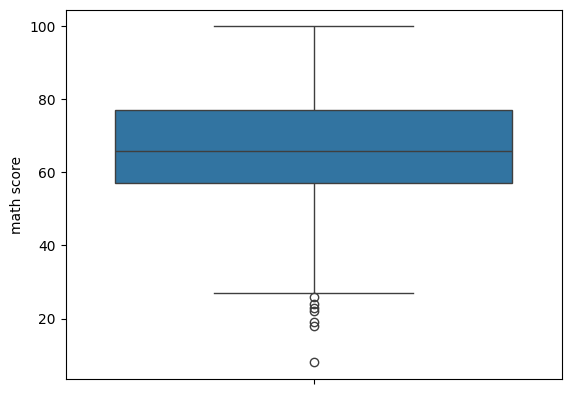

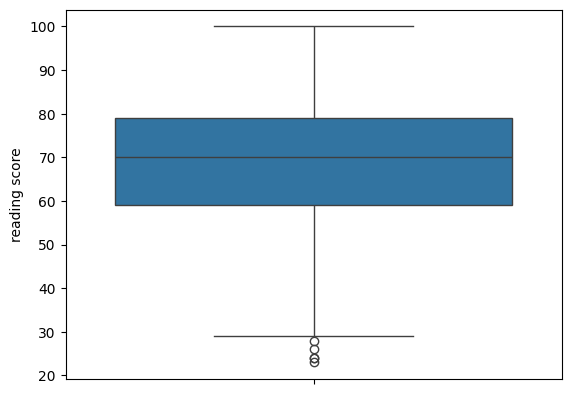

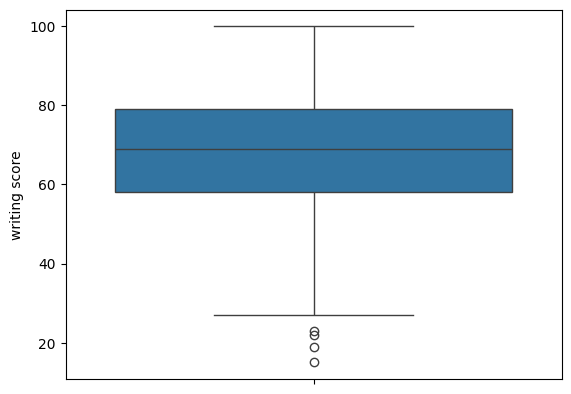

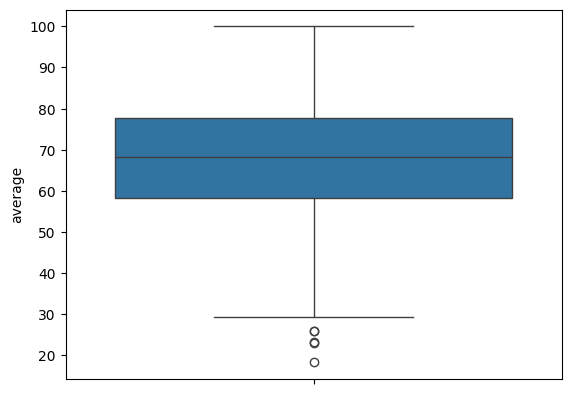

In [156]:
for feature in numeric.columns:
    sns.boxplot(data=df, y=feature)
    plt.show()

# An outlier with very little score observed

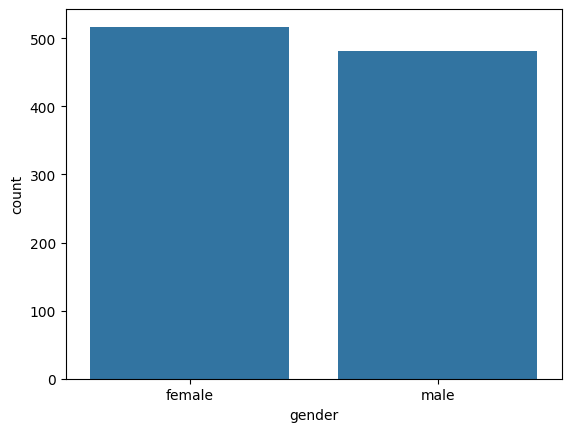

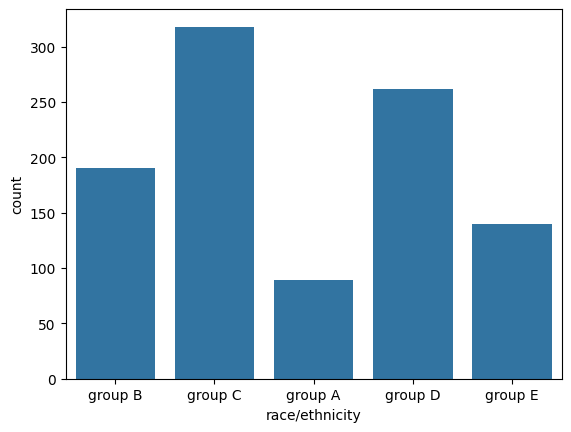

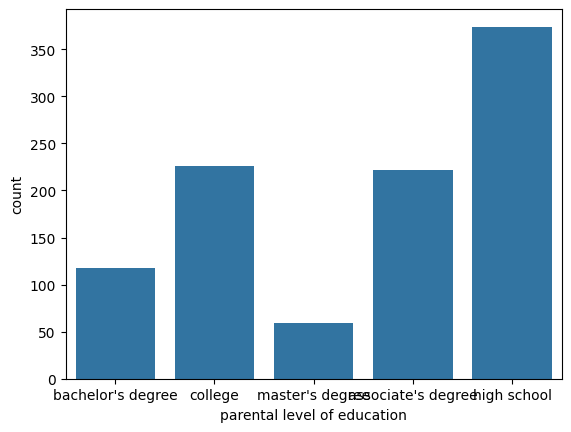

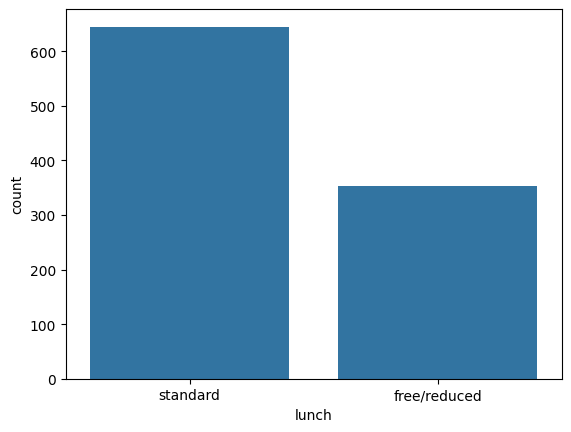

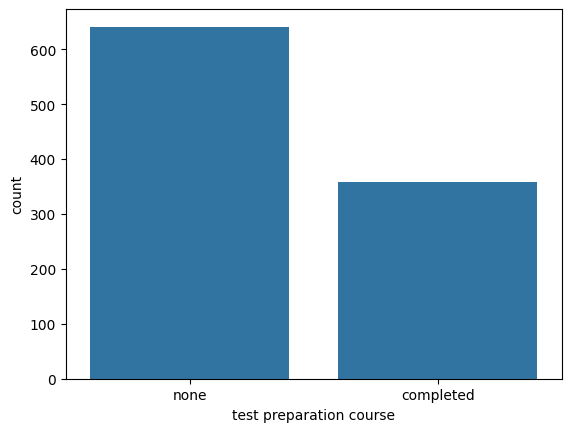

In [ ]:
for feature in df.select_dtypes(exclude='number').columns:
    sns.countplot(data=df, x=feature)
    plt.show()

# Observations:
# - majority female
# - group C is dominant
# - many parents have studied till highschool
# - many students go for standard
# - many students have not opted for prep course

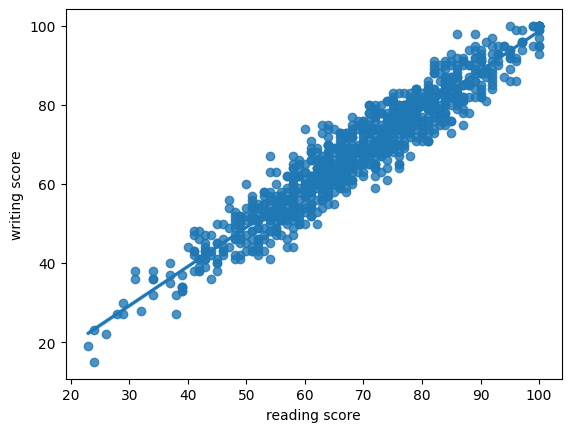

In [ ]:
sns.regplot(data=df, x='reading score', y='writing score')
plt.show()
# reading and writing score relation plot

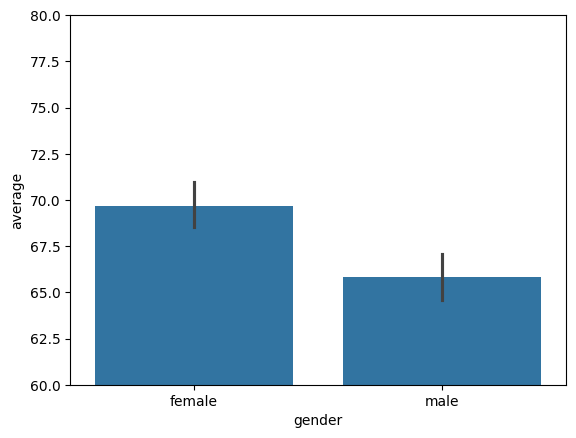

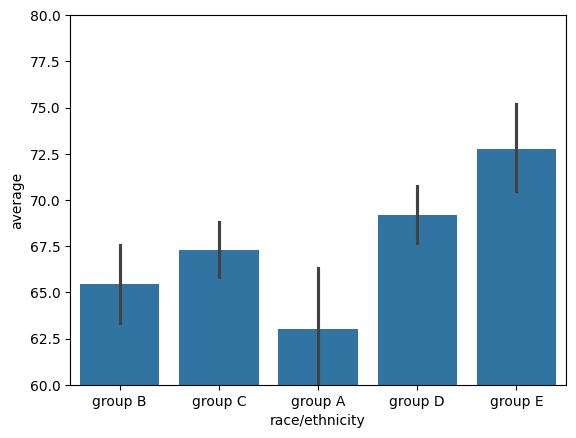

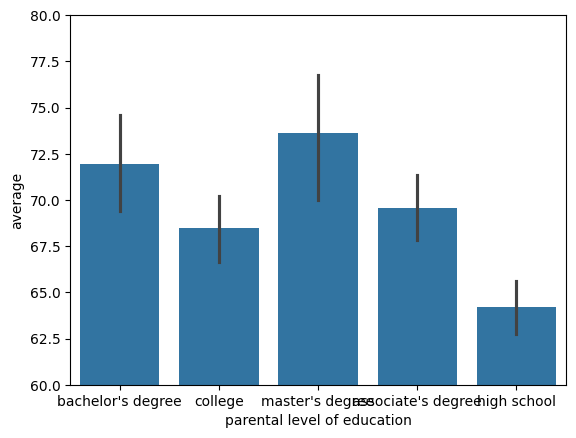

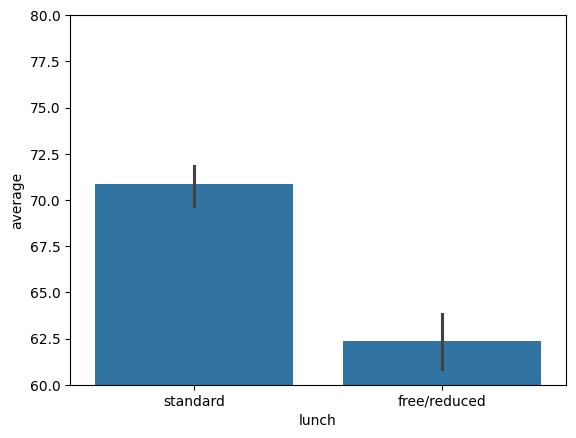

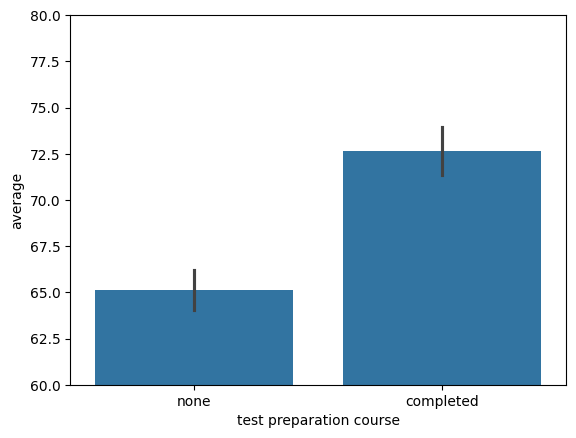

In [ ]:
for feature in df.select_dtypes(exclude='number').columns:
    sns.barplot(data=df, x=feature, y='average')
    plt.ylim((60, 80))
    plt.show()

# Observations:
# - Female students score a higher mean average than males
# - group E students score a higher mean average than others
# - students who's parents have an education level of master's have the highest mean average
# - students that take the free lunch have a higher mean average (altho seems unrelated but must have to do with the home background of the individuals)
# - students who have taken the test prep course have a higher mean average

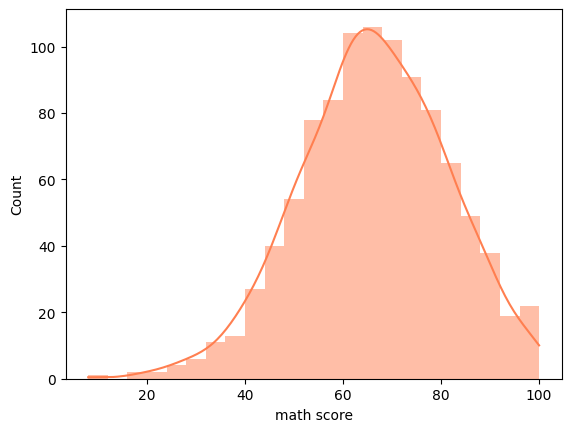

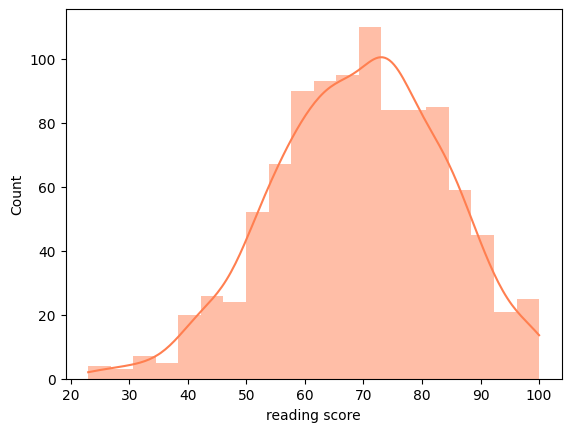

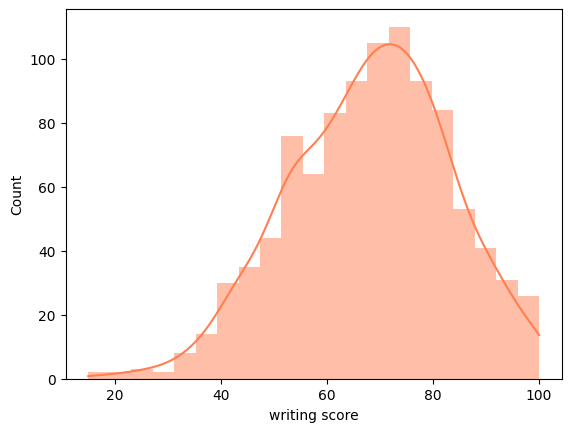

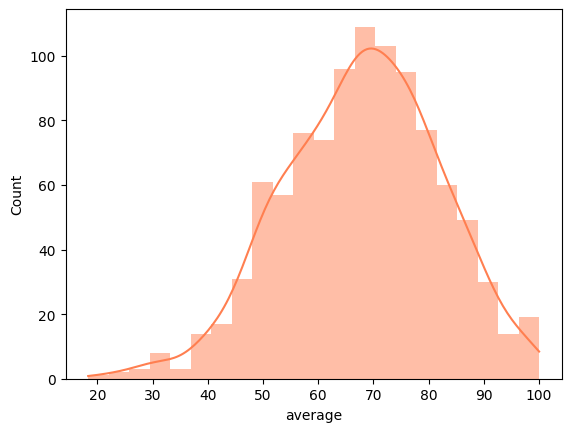

In [158]:
for feature in numeric.columns:
    sns.histplot(data=df, x=feature, edgecolor='none', kde=True, color='coral')
    plt.show()

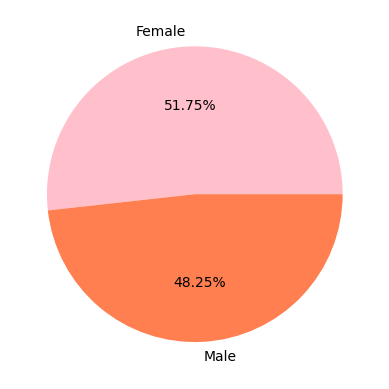

In [ ]:
genders = df.groupby('gender').size().values
plt.pie(genders, autopct='%.2f%%', labels=['Female', 'Male'], colors=['pink', 'coral'])
plt.show()

In [247]:
df['grade'] = pd.cut(df['average'], [float('-inf'), 49, 59, 69, 79, 89, float('inf')], labels=['Fail', 'D', 'C', 'B', 'A', 'A+'])

In [ ]:
df[(df['average'] >= 80) & (df['average'] < 90) & (df['grade'] == 'A+')]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average,grade
125,female,group B,high school,standard,none,87,95,86,89.333333,A+
397,female,group C,associate's degree,standard,none,85,89,95,89.666667,A+
420,female,group C,associate's degree,free/reduced,completed,82,93,93,89.333333,A+
514,female,group B,master's degree,free/reduced,completed,77,97,94,89.333333,A+
614,female,group A,associate's degree,standard,none,82,93,93,89.333333,A+
652,female,group D,college,standard,completed,85,86,98,89.666667,A+


In [260]:
def get_df_without_numeric():
    return df.drop(labels=['reading score', 'math score', 'writing score', 'average'], axis=1).copy()

In [ ]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler

19.0


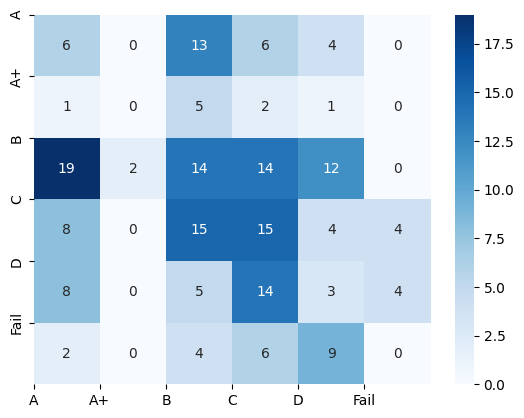

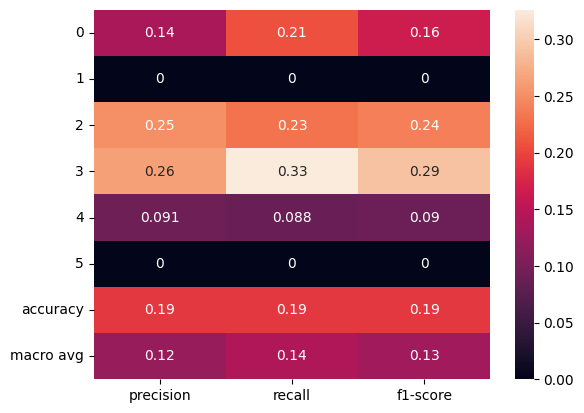

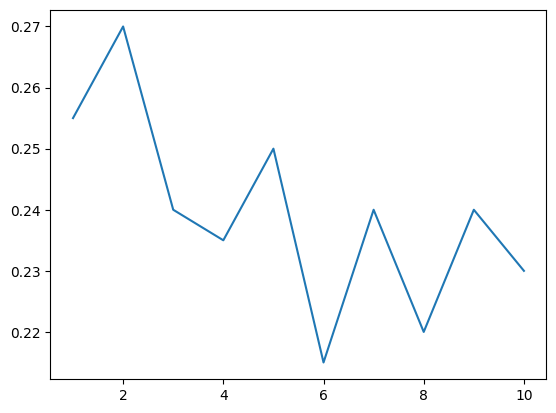

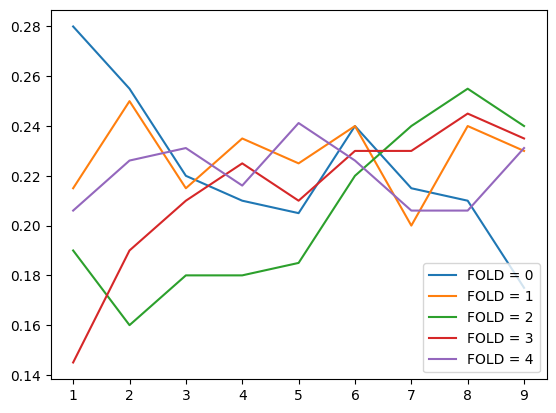

In [372]:
def apply_knn():
    dfknn = get_df_without_numeric()
    label_encoder = LabelEncoder()
    dfknn_encoded = dfknn.copy()

    for feature in dfknn_encoded.columns:
        dfknn_encoded[feature] = label_encoder.fit_transform(dfknn_encoded[feature])

    X = dfknn_encoded.iloc[:, :-1]
    y = dfknn_encoded.iloc[:, -1]

    test_size = 0.2
    random_seed = 42
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_seed)

    knn = KNeighborsClassifier(10)
    knn.fit(X_train, y_train)

    predictions = knn.predict(X_test)
    acc_score = accuracy_score(y_test, predictions)
    classification = classification_report(y_test, predictions, output_dict=True)
    confusion = confusion_matrix(y_test, predictions)

    print(acc_score * 100)

    labels = label_encoder.inverse_transform([0, 1, 2, 3, 4, 5])

    sns.heatmap(confusion, annot=True, cmap='Blues')
    plt.xticks(ticks=[0, 1, 2, 3, 4, 5], labels=labels)
    plt.yticks(ticks=[0, 1, 2, 3, 4, 5], labels=labels)
    plt.show()

    confusion_df = pd.DataFrame(classification).T.iloc[:-1, :-1]
    sns.heatmap(confusion_df, annot=True)
    plt.show()


def apply_knn_vs_k(k: int):
    knndf = get_df_without_numeric()
    knndf_encoded = knndf.copy()
    le = LabelEncoder()

    for feature in knndf_encoded.columns:
        knndf_encoded[feature] = le.fit_transform(knndf_encoded[feature])

    X = knndf_encoded.iloc[:, :-1]
    y = knndf_encoded.iloc[:, -1]
    random_seed = 7
    t_size = 0.2

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=t_size, random_state=random_seed)

    accs = []
    for i in range(1, k+1):
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(X=X_train, y=y_train)
        acc = accuracy_score(y_test, knn.predict(X_test))
        accs.append(acc)

    plt.plot(np.arange(1, k+1), accs)
    plt.show()


def apply_kfold():
    dfknn = get_df_without_numeric()
    le = LabelEncoder()

    for feature in dfknn.columns:
        dfknn[feature] = le.fit_transform(dfknn[feature])
    
    X = dfknn.iloc[:, :-1]
    y = dfknn.iloc[:, -1]

    kfold = KFold(5, shuffle=True, random_state=42)

    for i, (train_index, test_index) in enumerate(kfold.split(X)):
        accs = []
        for k in range(1, 10):
            knn = KNeighborsClassifier(n_neighbors=k)
            knn.fit(X=X.iloc[train_index], y=y.iloc[train_index])
            predictions = knn.predict(X=X.iloc[test_index])
            accs.append(accuracy_score(y_true=y.iloc[test_index], y_pred=predictions))
        plt.plot(np.arange(1, 10), accs, label=f'FOLD = {i}')
    plt.legend()
    plt.show()

apply_knn()
apply_knn_vs_k(10)
apply_kfold()